# Data for Excel Examples

Downloads unemployment rate and labor force data for the US. Exports data to Excel. This Notebook uses `fredpy`: https://www.briancjenkins.com/linearsolve/docs/build/html/index.html

## Preliminaries

In [1]:
import fredpy as fp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load fredpy API key
fp.api_key = fp.load_api_key('fred_api_key.txt')

## Download data from FRED and manage

In [3]:
# Download labor market data
u = fp.series('unrate').data
u_men = fp.series('LNS14000001').data
u_women = fp.series('LNS14000002').data
lf_men = fp.series('LNS11000001').data
lf_women = fp.series('LNS11000002').data

# Concatenate data into a DataFrame
df = pd.concat([u,u_men,u_women,lf_men,lf_women],axis=1).dropna()
df.columns = ['Unemployment Rate','Unemployment Rate - Men','Unemployment Rate - Women','Labor Force - Men','Labor Force - Women']
df.index.name = 'Date'

# Export data as csv
df.to_csv('../Data/labor_force_data.csv')

# Plots to be produced in Excel

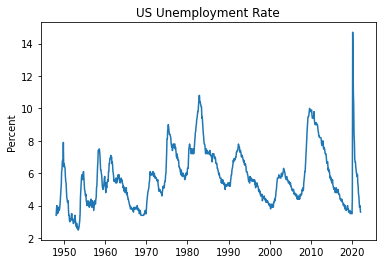

In [4]:
# US unemployment rate
plt.plot(u)
plt.ylabel('Percent')
plt.title('US Unemployment Rate');

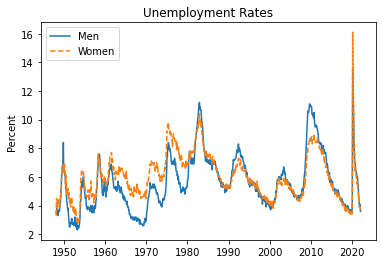

In [5]:
# Men's and women's unemployment rates
plt.plot(u_men,label='Men')
plt.plot(u_women,'--',label='Women')
plt.ylabel('Percent')
plt.title('Unemployment Rates')
plt.legend();

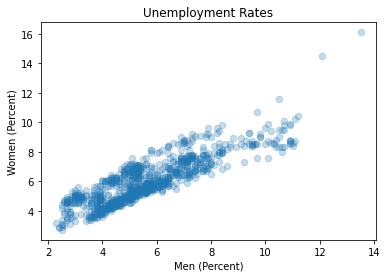

In [6]:
# Scatter plot of men's v. women's unemployment rates
plt.scatter(u_men,u_women,s=40,alpha=0.25)
plt.xlabel('Men (Percent)')
plt.ylabel('Women (Percent)')
plt.title('Unemployment Rates');